__Classification of Machine Failure__

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
maintenance_data = pd.read_csv("Maintenance.csv")

In [3]:
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
maintenance_data.shape

(10000, 14)

In [5]:
maintenance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
maintenance_data['Type'] = maintenance_data['Type'].astype('category')

In [7]:
maintenance_data.dtypes

UDI                           int64
Product ID                   object
Type                       category
Air temperature [K]         float64
Process temperature [K]     float64
Rotational speed [rpm]        int64
Torque [Nm]                 float64
Tool wear [min]               int64
Machine failure               int64
TWF                           int64
HDF                           int64
PWF                           int64
OSF                           int64
RNF                           int64
dtype: object

__Missing Values Imputation__

In [8]:
maintenance_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<AxesSubplot:>

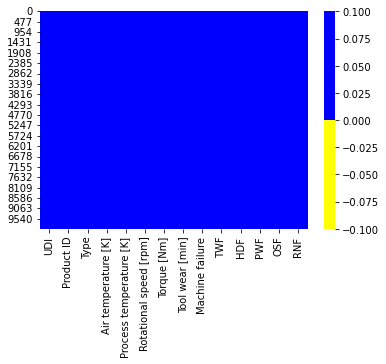

In [9]:
cols=maintenance_data.columns
colour=['yellow', 'blue']
sns.heatmap(maintenance_data[cols].isnull(),
           cmap=sns.color_palette(colour))

In [10]:
maintenance_data.nunique(axis = 0)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [11]:
maintenance_data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [12]:
maintenance_data["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

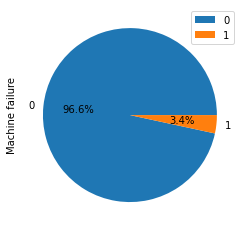

In [13]:
maintenance_data['Machine failure'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [14]:
maintenance_data['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [15]:
maintenance_data['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [16]:
maintenance_data['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [17]:
maintenance_data['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [18]:
maintenance_data['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [19]:
# forming a dataframe of attributes that results in machine failure
info={'submodes':['TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],'failure':[46,95,115,98,19]}
submodes=pd.DataFrame(info)
submodes

,submodes,failure
0,TWF,46
1,HDF,95
2,PWF,115
3,OSF,98
4,RNF,19


In [20]:
# checking for duplicated values
maintenance_data[maintenance_data.duplicated()].shape

(0, 14)

In [21]:
maintenance_data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [22]:
# copying the data
data = maintenance_data.copy

### Data  Pre-Processing

#### Data type conversion

In [23]:
# Transforming data with the help of label encoder 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# df2 = pd.get_dummies(df, columns = ['Type'])

In [24]:
df = maintenance_data
df.iloc[:, 2] = labelencoder.fit_transform(df.iloc[:, 2])
# d['Type'].replace({'H' : 0, 'L' : 1, 'M' : 2}, inplace = True) --- Alternate method
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### Renaming the columns

In [25]:
final_data = df.rename({'Air temperature [K]' : 'AT_K', 'Process temperature [K]' : 'PT_K', 'Rotational speed [rpm]' : 'RS_rpm',
                        'Torque [Nm]' : 'Torque', 'Tool wear [min]' : 'TW_min'}, axis = 1)

In [26]:
final_data.head()

,UDI,Product ID,Type,AT_K,PT_K,RS_rpm,Torque,TW_min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Data visualisation

### Pair plot

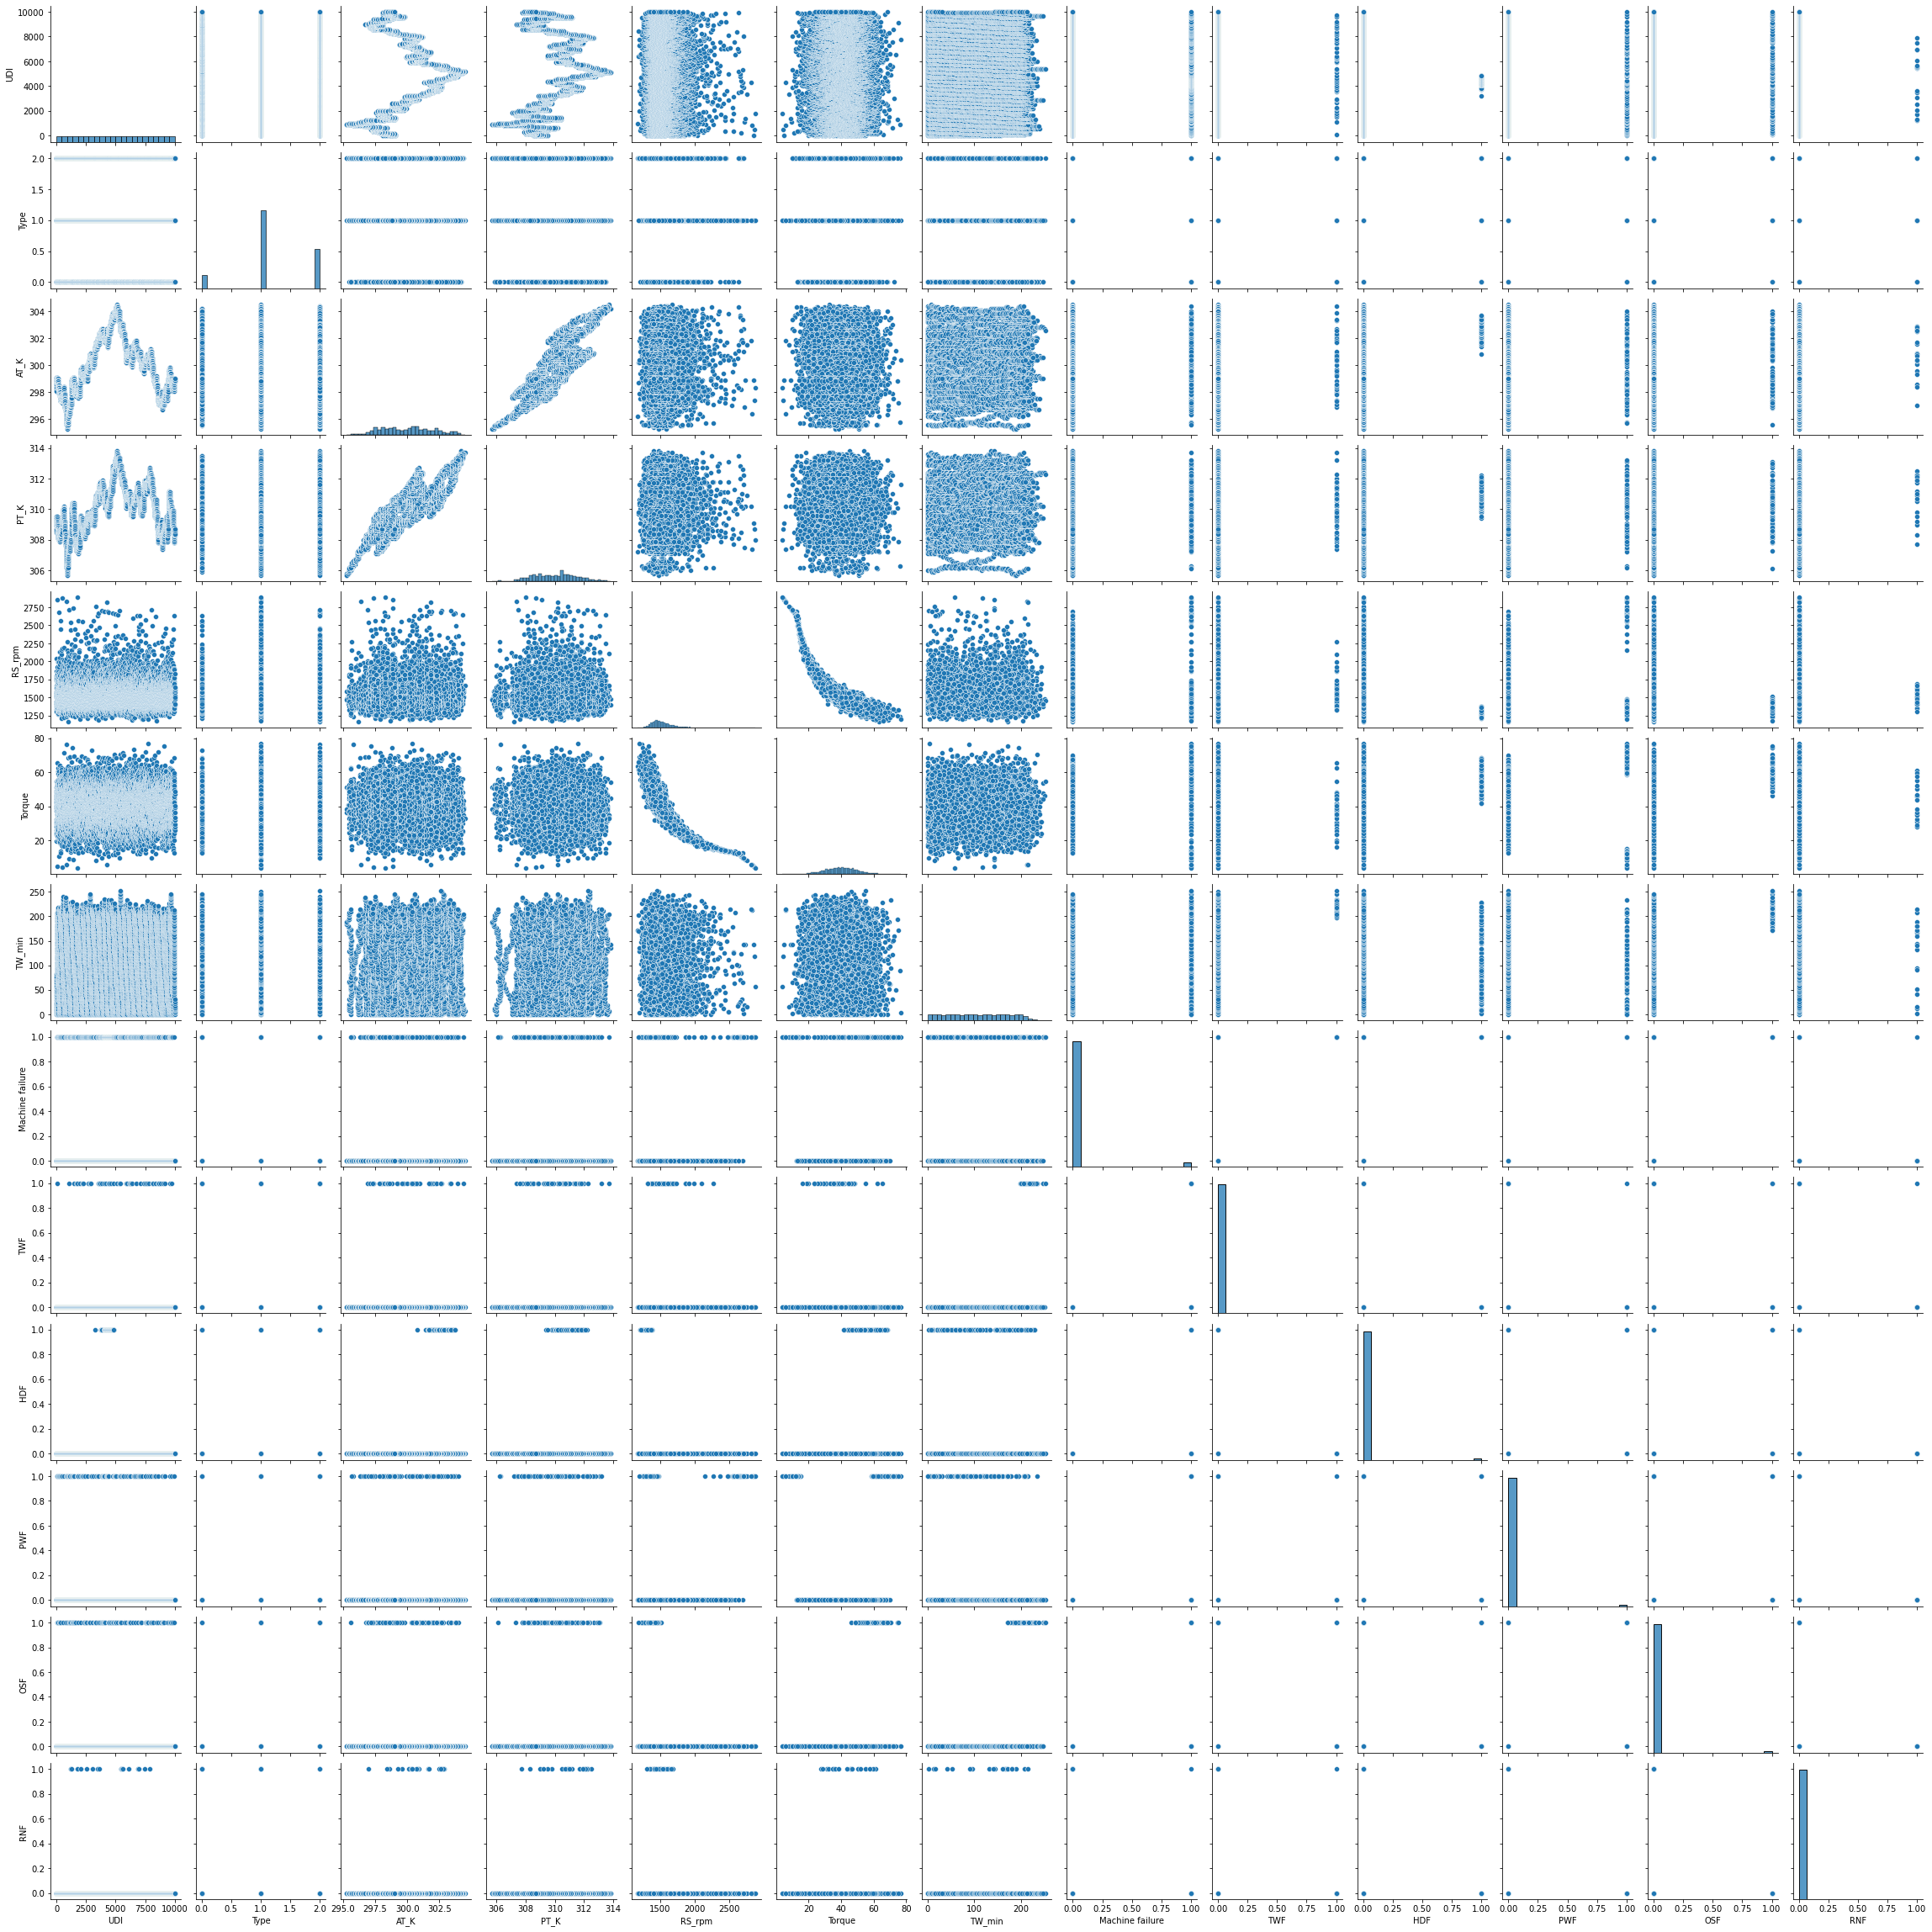

In [27]:
sns.pairplot(final_data)

In [28]:
final_data.iloc[:, 2 : 9].corr()

,Type,AT_K,PT_K,RS_rpm,Torque,TW_min,Machine failure
Type,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152
AT_K,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
PT_K,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
RS_rpm,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
TW_min,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


### Heat Map

<AxesSubplot:>

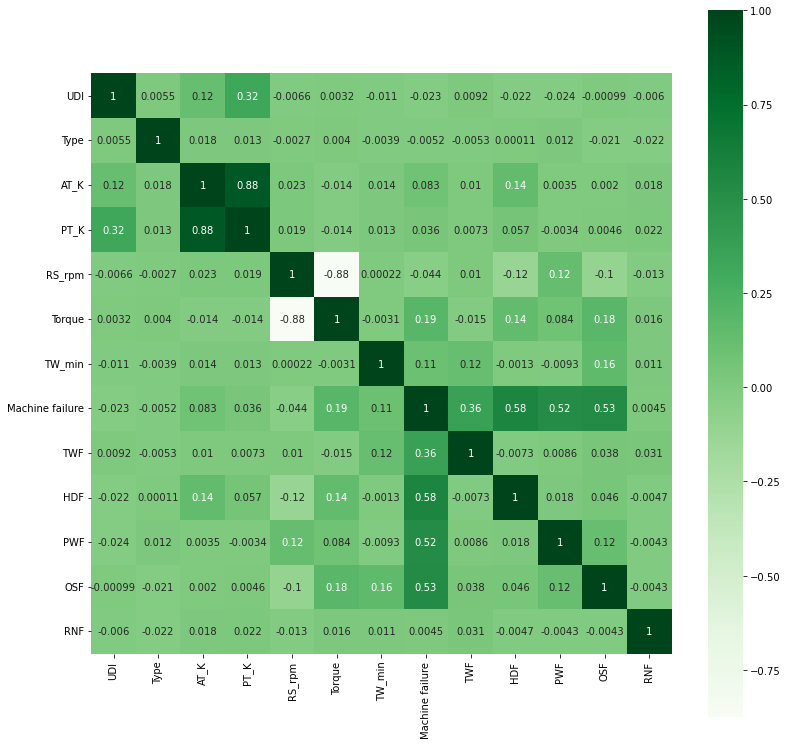

In [29]:
correlation = final_data.corr()
plt.figure(figsize = (13, 13))
sns.heatmap(correlation, annot = True, cbar = True, square = True, cmap = 'Greens')

__From the above Heat map we can say that :-__
1. Air Temperature and Process Temperature are highly/positively correlated with each other
2. Rotational Speed is negatively correlated with the target variable (Machine failure)
3. Rotational speed and torque are negatively correlated with each other

<AxesSubplot:>

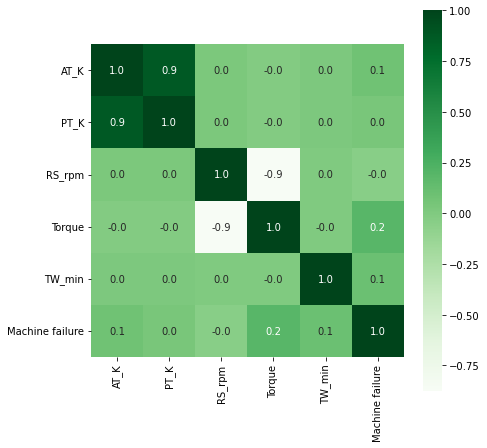

In [30]:
correlation = final_data.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(correlation.iloc[2:8,2:8], annot = True, cbar = True, square = True, cmap = 'Greens', fmt = '.1f')

<AxesSubplot:>

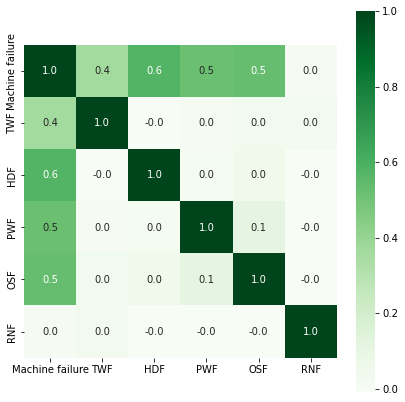

In [31]:
correlation = final_data.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(correlation.iloc[7:,7:], annot = True, cbar = True, square = True, cmap = 'Greens', fmt = '.1f')

Text(0.5, 1.0, 'Type of Machine')

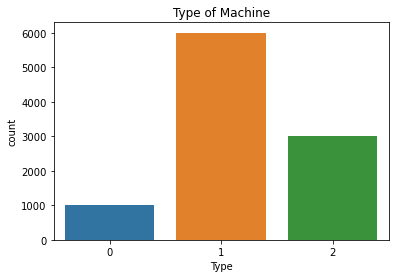

In [32]:
sns.countplot(final_data['Type'])
plt.title('Type of Machine')

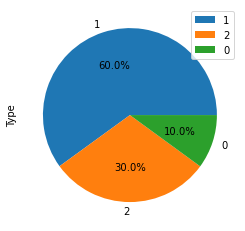

In [33]:
final_data['Type'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

<AxesSubplot:xlabel='Type'>

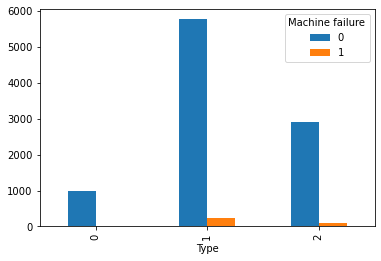

In [34]:
# Machine failure for each type
pd.crosstab(final_data['Type'], final_data['Machine failure']).plot(kind = 'bar')

### Pie charts for submodes failure

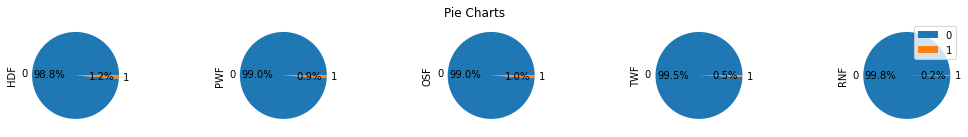

In [35]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5, figsize=(18,2))
fig.suptitle('Pie Charts')
final_data['HDF'].value_counts().plot(kind='pie',ax=ax1,autopct='%01.01f%%')
final_data['PWF'].value_counts().plot(kind='pie',ax=ax2,autopct='%01.01f%%')
final_data['OSF'].value_counts().plot(kind='pie',ax=ax3,autopct='%01.01f%%')
final_data['TWF'].value_counts().plot(kind='pie',ax=ax4,autopct='%01.01f%%')
final_data['RNF'].value_counts().plot(kind='pie',ax=ax5,autopct='%01.01f%%')
plt.legend()

### Box plots for failure rates

<AxesSubplot:xlabel='Machine failure', ylabel='Torque'>

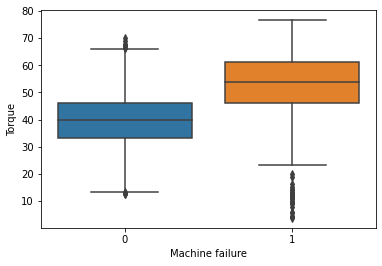

In [36]:
sns.boxplot(x="Machine failure",y="Torque",data=final_data)

<AxesSubplot:xlabel='Machine failure', ylabel='TW_min'>

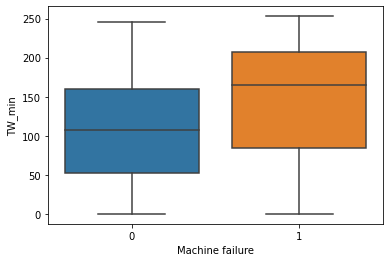

In [37]:
sns.boxplot(x="Machine failure",y="TW_min",data=final_data)

<AxesSubplot:xlabel='TWF', ylabel='TW_min'>

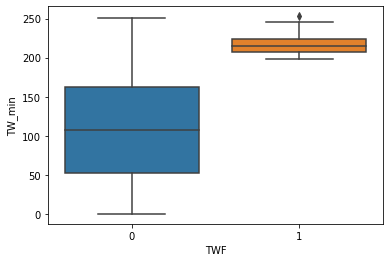

In [38]:
sns.boxplot(x="TWF",y="TW_min",data = final_data)

<AxesSubplot:xlabel='OSF', ylabel='TW_min'>

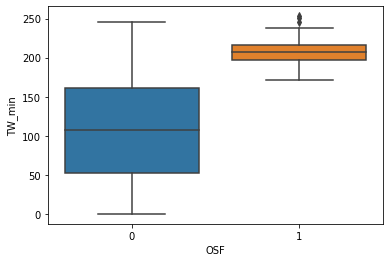

In [39]:
sns.boxplot(x="OSF",y="TW_min",data = final_data)

<AxesSubplot:xlabel='OSF', ylabel='Torque'>

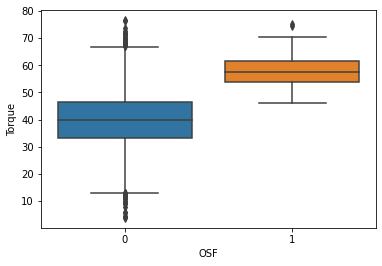

In [40]:
sns.boxplot(x="OSF",y="Torque",data=final_data)

<AxesSubplot:xlabel='HDF', ylabel='AT_K'>

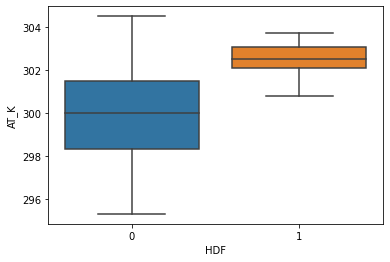

In [41]:
sns.boxplot(x="HDF",y="AT_K",data=final_data)

<AxesSubplot:xlabel='HDF', ylabel='Torque'>

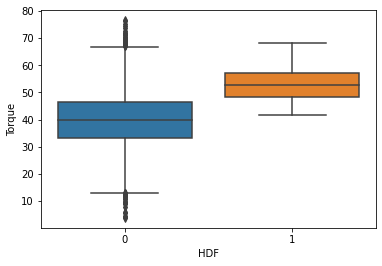

In [42]:
sns.boxplot(x="HDF",y="Torque",data=final_data)

## Feature Engineering

### Outliers detection

In [43]:
final_data.columns

Index(['UDI', 'Product ID', 'Type', 'AT_K', 'PT_K', 'RS_rpm', 'Torque',
       'TW_min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

### Box plot
* Checking For Outliers

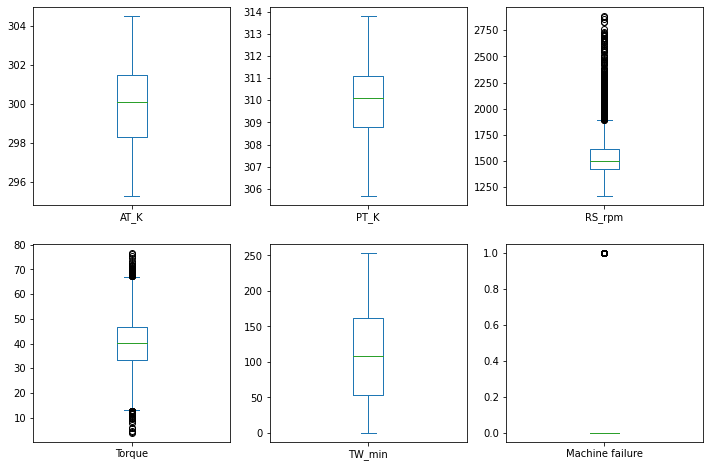

In [44]:
col = final_data[['AT_K', 'PT_K', 'RS_rpm', 'Torque', 'TW_min', 'Machine failure']]
col.plot(figsize=(12,8),kind='box', subplots=True, layout=(2,3))
plt.show()

### Histogram
* Checking the distribution of each attribute

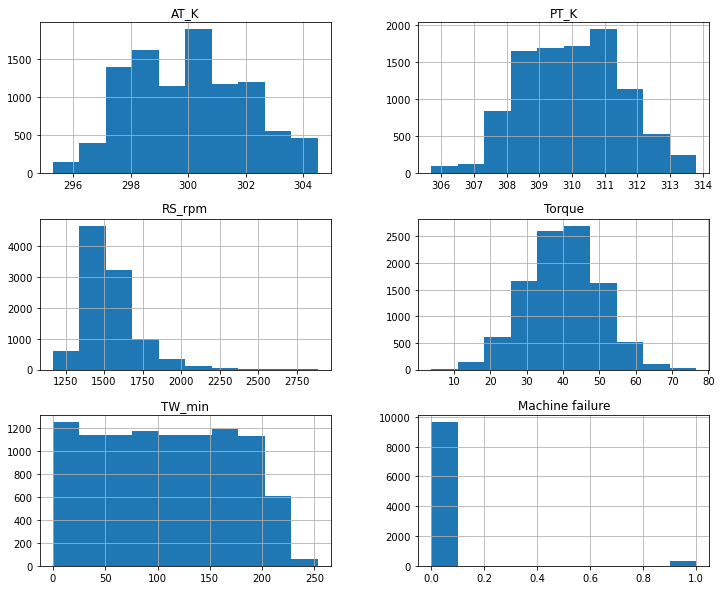

In [45]:
col.hist(figsize=(12, 10))
plt.show()

__Univariate Density Plots__
* checking the shape of the curve i.e. Bell curve or Gaussian curve

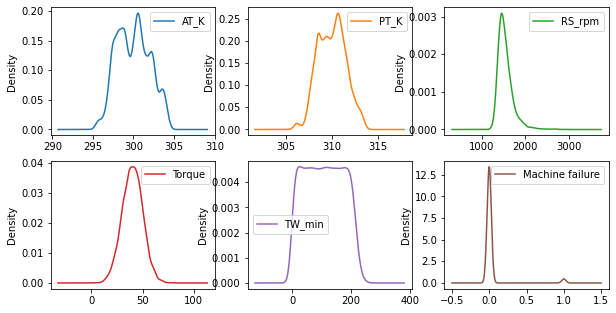

In [46]:
col.plot(kind='density',subplots=True, layout=(3,3), sharex=False, figsize = (10,8))
plt.show()

In [47]:
final_data["Torque"].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque, dtype: float64

### Using Z-score :-

Formula for Z-score = (Observation - mean)/ Standard deviation

z = (X - mu)/ sigma

In [48]:
outliers = []
def detect_outliers(data) :
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data :
        z_score = (i - mean)/std
        if np.abs(z_score > threshold) :
            outliers.append(i)
    return outliers

In [49]:
outliers_pt = detect_outliers(final_data['Torque'])
print(len(outliers_pt),'\n',outliers_pt)

14 
 [71.6, 76.2, 74.5, 72.8, 70.6, 70.5, 71.3, 70.0, 73.6, 70.0, 71.8, 76.6, 72.0, 75.4]


### Using Inter Quantile Range

* Q1 = 25th percentile
* Q3 = 75th percentile
* IQR = Q3 - Q1
* Upper limit = Q1 * 1.5
* lower limit = Q3 * 1.5
* Anything that lies above and below upper quantile and lower quantile respectively is an outlier

In [50]:
def plotvariable(df, variable):
    
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha = 0.5)
    
    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()

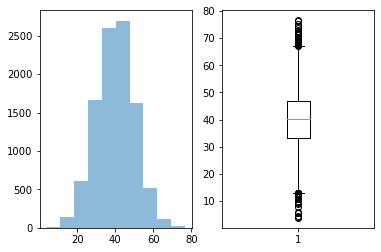

In [51]:
plotvariable(final_data, 'Torque')

In [52]:
def find_boundaries(df, variables) :
    
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    
    return lower_boundary, upper_boundary

__Finding Upper and Lower limit for Torque__

In [53]:
lower_torque, upper_torque = find_boundaries(final_data, 'Torque')
print('upper limit for torque is : ', upper_torque)
print('lower limit for torque is : ', lower_torque)

upper limit for torque is :  67.19999999999999
lower limit for torque is :  12.800000000000011


__Removing the Outliers__

* dropping the outliers

In [54]:
outliers_torque = np.where(final_data['Torque'] > upper_torque, True, 
                          np.where(final_data['Torque'] < lower_torque, True, False))

In [55]:
outliers_torque

array([False, False, False, ..., False, False, False])

In [56]:
eng_data = final_data.loc[~(outliers_torque),]

In [57]:
print(final_data.shape)
print(eng_data.shape)

(10000, 14)
(9931, 14)


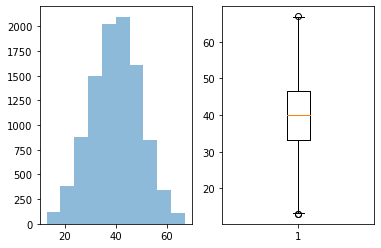

In [58]:
plotvariable(eng_data, 'Torque')

__capping variables at upper and lower limit__

* In this instead of dropping we replace the outliers with the maximum and min values 

In [59]:
final_data['Torque'] =  np.where(final_data['Torque'] > upper_torque, upper_torque, 
                          np.where(final_data['Torque'] < lower_torque, lower_torque, final_data['Torque']))

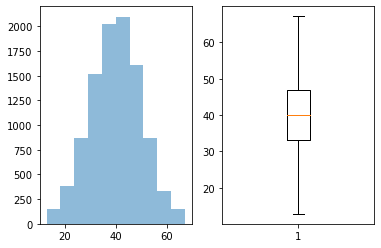

In [60]:
plotvariable(final_data, 'Torque')

In [61]:
final_data.shape

(10000, 14)

In [62]:
# dropping columns
features=['UDI', 'Product ID','RS_rpm']
final_data=final_data.drop(features,axis=1)
final_data.head()

,Type,AT_K,PT_K,Torque,TW_min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,40.0,9,0,0,0,0,0,0


__Automated EDA__
* We can create a complete EDA report in less time with the help of sweetviz and pandas profiling

In [63]:
# creating Report using sweetviz
"""import sweetviz as sv
sweet_report=sv.analyze(final_data)
sweet_report.show_html('result_report.html')"""

"import sweetviz as sv\nsweet_report=sv.analyze(final_data)\nsweet_report.show_html('result_report.html')"

In [64]:
# df1 = final_data

In [65]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df1, title = "Pandas Profiling", explorative  = True)

In [66]:
# profile.to_notebook_iframe()     

## Data Transformation (Standardization)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
array = final_data.values
scaler = StandardScaler()
rescaledX = scaler.fit_transform(array[:,1:5])
rescaledX

array([[-0.95238944, -0.94735989,  0.28409057, -1.69598374],
       [-0.90239341, -0.879959  ,  0.63712216, -1.6488517 ],
       [-0.95238944, -1.01476077,  0.94980728, -1.61743034],
       ...,
       [-0.50242514, -0.94735989, -0.66405141, -1.35034876],
       [-0.50242514, -0.879959  ,  0.85902773, -1.30321671],
       [-0.50242514, -0.879959  ,  0.02183853, -1.22466331]])

In [69]:
# converting array into data frame
df2 = pd.DataFrame(rescaledX, columns= ['AT_K', 'PT_K', 'Torque', 'TW_min'])
df2.head()

,AT_K,PT_K,Torque,TW_min
0,-0.952389,-0.947360,0.284091,-1.695984
1,-0.902393,-0.879959,0.637122,-1.648852
2,-0.952389,-1.014761,0.949807,-1.617430
3,-0.902393,-0.947360,-0.048768,-1.586009
4,-0.902393,-0.879959,0.001665,-1.554588


In [70]:
a = final_data.iloc[:,0:1]
b = final_data.iloc[:,5:]
final_df = pd.concat([a, df2, b], axis = 1)
final_df.head()

,Type,AT_K,PT_K,Torque,TW_min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,-0.952389,-0.947360,0.284091,-1.695984,0,0,0,0,0,0
1,1,-0.902393,-0.879959,0.637122,-1.648852,0,0,0,0,0,0
2,1,-0.952389,-1.014761,0.949807,-1.617430,0,0,0,0,0,0
3,1,-0.902393,-0.947360,-0.048768,-1.586009,0,0,0,0,0,0
4,1,-0.902393,-0.879959,0.001665,-1.554588,0,0,0,0,0,0


## Data Balancing

* Balancing the data set using SMOTETomek library

In [71]:
X = final_df.iloc[:,0:5]
y = final_df.iloc[:, 5]
print(X)
print(y)

      Type      AT_K      PT_K    Torque    TW_min
0        2 -0.952389 -0.947360  0.284091 -1.695984
1        1 -0.902393 -0.879959  0.637122 -1.648852
2        1 -0.952389 -1.014761  0.949807 -1.617430
3        1 -0.902393 -0.947360 -0.048768 -1.586009
4        1 -0.902393 -0.879959  0.001665 -1.554588
...    ...       ...       ...       ...       ...
9995     2 -0.602417 -1.082162 -1.057429 -1.476034
9996     0 -0.552421 -1.082162 -0.825437 -1.428902
9997     2 -0.502425 -0.947360 -0.664051 -1.350349
9998     0 -0.502425 -0.879959  0.859028 -1.303217
9999     2 -0.502425 -0.879959  0.021839 -1.224663

[10000 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64


In [72]:
# pip install imblearn

In [73]:
# from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek

In [74]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)

In [75]:
X_res,y_res=smk.fit_resample(X, y)
X_res.shape,y_res.shape

((19290, 5), (19290,))

In [76]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 9661, 1: 339})
Resampled dataset shape Counter({0: 9645, 1: 9645})


In [77]:
# Balancing submodes
for i in range(5, 11) :
    x = final_df.iloc[:, :5]
    Y = final_df.iloc[:, i]
    x_res, Y_res = smk.fit_resample(x, Y)
    print(x_res.shape, Y_res.shape)
i += 1

(19290, 5) (19290,)
(19908, 5) (19908,)
(19770, 5) (19770,)
(19808, 5) (19808,)
(19804, 5) (19804,)
(19960, 5) (19960,)


### Feature Importance
* getting the important features using Extra trees classifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res, y_res)

ExtraTreesClassifier()

In [79]:
print(model.feature_importances_)

[0.02992855 0.18539646 0.11324789 0.45739288 0.21403422]


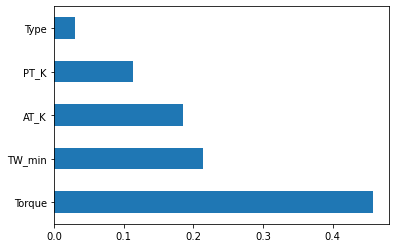

In [80]:
# plotting graph for better visualization
feat_imp = pd.Series(model.feature_importances_, index = X_res.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

In [84]:
! pip install XGBoost

     ---------------------------------------- 70.9/70.9 MB 7.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Model Building

### without Sampled Data

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [86]:
X_ns = final_df.iloc[:, 0:5]
y_ns = final_df.iloc[:, 5]
print(X)
print(y)

      Type      AT_K      PT_K    Torque    TW_min
0        2 -0.952389 -0.947360  0.284091 -1.695984
1        1 -0.902393 -0.879959  0.637122 -1.648852
2        1 -0.952389 -1.014761  0.949807 -1.617430
3        1 -0.902393 -0.947360 -0.048768 -1.586009
4        1 -0.902393 -0.879959  0.001665 -1.554588
...    ...       ...       ...       ...       ...
9995     2 -0.602417 -1.082162 -1.057429 -1.476034
9996     0 -0.552421 -1.082162 -0.825437 -1.428902
9997     2 -0.502425 -0.947360 -0.664051 -1.350349
9998     0 -0.502425 -0.879959  0.859028 -1.303217
9999     2 -0.502425 -0.879959  0.021839 -1.224663

[10000 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64


In [87]:
# splitting the data for trainig and testing
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size= 0.25, random_state= 0)

In [88]:
print(X_train_ns.shape)
print(X_test_ns.shape)
print(y_train_ns.shape)
print(y_test_ns.shape)

(7500, 5)
(2500, 5)
(7500,)
(2500,)


In [89]:
model = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),
         GaussianNB(),KNeighborsClassifier(), SVC()]

for i in model:
    print()
    print(i)
    model=i
    
    # Model training
    model.fit(X_train_ns, y_train_ns)
    
    # Model testing
    y_pred_train_ns = model.predict(X_train_ns)
    y_pred_test_ns = model.predict(X_test_ns)
    
    # Confusion matrix
    conf_matrix=confusion_matrix(y_test_ns, y_pred_test_ns)
    
    # Model Evalution
    print('Train accuracy is       : ', accuracy_score(y_train_ns, y_pred_train_ns))
                                    
    print('Test accuracy is        : ', accuracy_score(y_test_ns, y_pred_test_ns))
    
    print('Confusion matrix        : ', confusion_matrix(y_test_ns, y_pred_test_ns))

    print('classification report is: \n', classification_report(y_test_ns, y_pred_test_ns))
        


LogisticRegression()
Train accuracy is       :  0.9684
Test accuracy is        :  0.9656
Confusion matrix        :  [[2412    0]
 [  86    2]]
classification report is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2412
           1       1.00      0.02      0.04        88

    accuracy                           0.97      2500
   macro avg       0.98      0.51      0.51      2500
weighted avg       0.97      0.97      0.95      2500


DecisionTreeClassifier()
Train accuracy is       :  1.0
Test accuracy is        :  0.9628
Confusion matrix        :  [[2366   46]
 [  47   41]]
classification report is: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2412
           1       0.47      0.47      0.47        88

    accuracy                           0.96      2500
   macro avg       0.73      0.72      0.72      2500
weighted avg       0.96      0.96      0.96      2500




### With Sampled Data

#### Logistic Regression

In [90]:
classifier = LogisticRegression()

In [91]:
print(X_res)
print(y_res)

       Type      AT_K      PT_K    Torque    TW_min
0         2 -0.952389 -0.947360  0.284091 -1.695984
1         1 -0.902393 -0.879959  0.637122 -1.648852
2         1 -0.952389 -1.014761  0.949807 -1.617430
3         1 -0.902393 -0.947360 -0.048768 -1.586009
4         1 -0.902393 -0.879959  0.001665 -1.554588
...     ...       ...       ...       ...       ...
19285     0  0.247342 -0.071148  0.596915  1.603259
19286     1 -0.899934 -1.031338 -2.741894 -0.367276
19287     1 -0.093657  0.349125 -1.153857  1.783474
19288     2  0.016696 -0.173661 -1.280330  1.916391
19289     2  1.052673  0.387433  0.826789 -0.369625

[19290 rows x 5 columns]
0        0
1        0
2        0
3        0
4        0
        ..
19285    1
19286    1
19287    1
19288    1
19289    1
Name: Machine failure, Length: 19290, dtype: int64


In [92]:
# splitting the data for trainig and testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.25, random_state= 0)

In [93]:
# Model training
classifier.fit(X_train, y_train)

LogisticRegression()

In [94]:
classifier.coef_

array([[-0.23776202,  1.31203228, -0.93132689,  0.63949445,  0.64136465]])

In [95]:
classifier.predict_proba(X_train)

array([[0.1637026 , 0.8362974 ],
       [0.36764962, 0.63235038],
       [0.92476868, 0.07523132],
       ...,
       [0.94413204, 0.05586796],
       [0.95666557, 0.04333443],
       [0.41542761, 0.58457239]])

In [96]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train)
y_pred_test = classifier.predict(X_test)
print(y_pred_test)

[1 1 0 ... 0 0 1]
[0 1 1 ... 0 0 1]


In [97]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

[[1822  571]
 [ 499 1931]]


In [98]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy for train data :- ", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy for test data :- ", test_accuracy)

Accuracy for train data :-  0.783438169627428
Accuracy for test data :-  0.7781463819199669


In [99]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2393
           1       0.77      0.79      0.78      2430

    accuracy                           0.78      4823
   macro avg       0.78      0.78      0.78      4823
weighted avg       0.78      0.78      0.78      4823



#### Decision Tree Classifier

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
model.feature_importances_

array([0.01316741, 0.18106766, 0.08894868, 0.5013026 , 0.21551365])

In [102]:
model.predict_proba(X_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [103]:
y_pred_train = model.predict(X_train)
print(y_pred_train)
y_pred_test = model.predict(X_test)
print(y_pred_test)

[0 0 0 ... 0 1 0]
[0 1 1 ... 0 0 1]


In [104]:
print("Support Vector Classification Model : ")
print(classification_report(y_test, y_pred_test))

Support Vector Classification Model : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2393
           1       0.95      0.97      0.96      2430

    accuracy                           0.96      4823
   macro avg       0.96      0.96      0.96      4823
weighted avg       0.96      0.96      0.96      4823



In [105]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

[[2277  116]
 [  80 2350]]


In [106]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy for train data :- ", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy for test data :- ", test_accuracy)

Accuracy for train data :-  1.0
Accuracy for test data :-  0.9593613933236574


In [107]:
print("Decision Tree Model : ")
print(classification_report(y_test, y_pred_test))

Decision Tree Model : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2393
           1       0.95      0.97      0.96      2430

    accuracy                           0.96      4823
   macro avg       0.96      0.96      0.96      4823
weighted avg       0.96      0.96      0.96      4823



#### Other Algorithms

In [108]:
model = [RandomForestClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC()]

for i in model:
    print()
    print(i)
    model = i

    # Model training
    model.fit(X_train, y_train)

    # Model testing
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Model Evalution
    print('Train accuracy is       : ', accuracy_score(y_train, y_pred_train))

    print('Test accuracy is        : ', accuracy_score(y_test, y_pred_test))

    print('Confusion matrix        : \n', confusion_matrix(y_test, y_pred_test))

    print('classification report is: \n', classification_report(y_test, y_pred_test))


RandomForestClassifier()
Train accuracy is       :  1.0
Test accuracy is        :  0.9747045407422766
Confusion matrix        : 
 [[2299   94]
 [  28 2402]]
classification report is: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2393
           1       0.96      0.99      0.98      2430

    accuracy                           0.97      4823
   macro avg       0.98      0.97      0.97      4823
weighted avg       0.98      0.97      0.97      4823


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
  

## Hyper Parameters Tuning

### Decision Tree

In [109]:
dt_model = DecisionTreeClassifier()

model_decisiontree = GridSearchCV(estimator = dt_model,param_grid = {'criterion' :['gini','entropy'],
                                                             'max_depth' :[3,5,7,8,10], 
                                                             'min_samples_split' :[2,3,4]})

model_decisiontree.fit(X_train,y_train)

print(model_decisiontree.best_params_)
print(model_decisiontree.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
0.9582498660470391


In [110]:
# Model training
dt_model_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3).fit(X_train,y_train)

# Model testing
y_pred_dt_tuned = dt_model_tuned.predict(X_test)

conf_matrix = confusion_matrix(y_test,y_pred_dt_tuned)
print('confusion matrix      : \n', conf_matrix)
# Model evalution
print('Accuracy              : ',(accuracy_score(y_test,y_pred_dt_tuned)))

print('classification report : \n', classification_report(y_test,y_pred_dt_tuned))


confusion matrix      : 
 [[2235  158]
 [  63 2367]]
Accuracy              :  0.954177897574124
classification report : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2393
           1       0.94      0.97      0.96      2430

    accuracy                           0.95      4823
   macro avg       0.96      0.95      0.95      4823
weighted avg       0.95      0.95      0.95      4823



### Random Forest Classifier

In [111]:
rf_model = RandomForestClassifier()

model_rf = GridSearchCV(estimator = rf_model,param_grid = {'n_estimators' : [20,50,70],
                                                             'criterion' :['gini','entropy'],
                                                             'max_depth' :[3,5,7,8,10], 
                                                             'min_samples_split' :[2,3,4]})
model_rf.fit(X_train,y_train)
print(model_rf.best_params_)
print(model_rf.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 50}
0.9631576684277828


In [112]:
# model training
rf_model_tuned = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split = 2, n_estimators=70)
rf_model_tuned.fit(X_train,y_train)

# Model testing
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

conf_matrix = confusion_matrix(y_test,y_pred_rf_tuned)
print('confusion matrix : \n', conf_matrix)

# Model evalution
print('Accuracy            : ', accuracy_score(y_test,y_pred_rf_tuned))
print('classification report : \n', classification_report(y_test,y_pred_rf_tuned))

confusion matrix : 
 [[2221  172]
 [  53 2377]]
Accuracy            :  0.9533485382541986
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2393
           1       0.93      0.98      0.95      2430

    accuracy                           0.95      4823
   macro avg       0.95      0.95      0.95      4823
weighted avg       0.95      0.95      0.95      4823



### Support Vector Classifier

In [113]:
kernals=['linear','rbf','poly']

for kernal in kernals:
    svc = SVC(kernel = kernal)
    print('KERNAL: ', kernal)
    svc.fit(X_train, y_train)
    
    y_pred_svc_tuned = svc.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred_svc_tuned)
    print('confusion matrix is: \n', conf_matrix)
    
    print('Accuracy :', accuracy_score(y_test,y_pred_svc_tuned))
    print('classification report : \n', classification_report(y_test,y_pred_svc_tuned))

    

KERNAL:  linear
confusion matrix is: 
 [[1927  466]
 [ 478 1952]]
Accuracy : 0.8042712004976156
classification report : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      2393
           1       0.81      0.80      0.81      2430

    accuracy                           0.80      4823
   macro avg       0.80      0.80      0.80      4823
weighted avg       0.80      0.80      0.80      4823

KERNAL:  rbf
confusion matrix is: 
 [[2162  231]
 [  88 2342]]
Accuracy : 0.9338585942359527
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2393
           1       0.91      0.96      0.94      2430

    accuracy                           0.93      4823
   macro avg       0.94      0.93      0.93      4823
weighted avg       0.94      0.93      0.93      4823

KERNAL:  poly
confusion matrix is: 
 [[2149  244]
 [ 167 2263]]
Accuracy : 0.9147833298776695
classificat

## Pickle file

In [114]:
import pickle

In [115]:
# open a file, where you ant to store the data
file = open('Machine_failure_project.sav', 'wb')

# dump information to that file
pickle.dump(rf_model, file)